<a href="https://colab.research.google.com/github/Varchala/NaturalLanguageProcessing_CSC8980/blob/main/nlp_gv_hw4_finalsub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

G VARCHALESWARI
vganugapati1@student.gsu.edu

In [ ]:
import nltk
import tensorflow as tf 
import numpy as np
from tensorflow.keras.preprocessing import sequence
from numpy import array
import logging
import pandas as pd
import numpy as np
import nltk
import os
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.ensemble import  RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import nltk
logging.getLogger('tensorflow').disabled = True

class_names = ["Negative", "Positive"]
seed_value=2361

In [ ]:
train = pd.read_csv("/content/sample_data/train.csv",encoding = "ISO-8859-1")
# test = pd.read_csv("/content/sample_data/test.csv",encoding = "ISO-8859-1")

# **1.**
Take the positive and the negative tweets only. Use Sklearn to split the dataset in 80%
training, 20% testing splits. Provide a nicely formatted summary of these splits,
containing their size) (15 points)

In [ ]:
train.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==4)], test_size=0.20, random_state=seed_value)

In [ ]:
print("Training set summary:\n")
print(a_train.info())
print(a_train.describe())
print("\nTest set summary:\n")
print(a_test.info())
print(a_test.describe())

Training set summary:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280000 entries, 1474686 to 1561195
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   polarity  1280000 non-null  int64 
 1   id        1280000 non-null  int64 
 2   date      1280000 non-null  object
 3   query     1280000 non-null  object
 4   user      1280000 non-null  object
 5   text      1280000 non-null  object
dtypes: int64(2), object(4)
memory usage: 68.4+ MB
None
           polarity            id
count  1.280000e+06  1.280000e+06
mean   1.999994e+00  1.998838e+09
std    2.000001e+00  1.935154e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956901e+09
50%    0.000000e+00  2.002074e+09
75%    4.000000e+00  2.177051e+09
max    4.000000e+00  2.329206e+09

Test set summary:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320000 entries, 402563 to 1311901
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
--

# **2.**
Use the code from the previous classes to build the following models (15 points):

a) SVM using TF-IDF.

b) Naive Bayes using TF-IDF.

c) Random Forest using TF-IDF.


In [ ]:
def train_model(aName,vecName, x,y):
  model = aName
  batch = 1
  for i in range(0,x.shape[0],1000):
    print("Training batch {}...".format(batch))
    batch += 1
    model.partial_fit(x[i:i+1000,:].todense().astype(np.float16), y[i:i+1000],classes=np.unique(y))
  return model

In [ ]:
# trans_data = trans_data.astype(np.float16)
vec = TfidfVectorizer()
x_train = vec.fit_transform(a_train.text)
y_train = a_train.polarity

In [ ]:
x_test = vec.transform(a_test.text.values)
y_test = a_test.polarity.values

In [ ]:
model_nb = train_model(MultinomialNB(),TfidfVectorizer(),x_train,y_train)

Training batch 1...
Training batch 2...
Training batch 3...
Training batch 4...
Training batch 5...
Training batch 6...
Training batch 7...
Training batch 8...
Training batch 9...
Training batch 10...
Training batch 11...
Training batch 12...
Training batch 13...
Training batch 14...
Training batch 15...
Training batch 16...
Training batch 17...
Training batch 18...
Training batch 19...
Training batch 20...
Training batch 21...
Training batch 22...
Training batch 23...
Training batch 24...
Training batch 25...
Training batch 26...
Training batch 27...
Training batch 28...
Training batch 29...
Training batch 30...
Training batch 31...
Training batch 32...
Training batch 33...
Training batch 34...
Training batch 35...
Training batch 36...
Training batch 37...
Training batch 38...
Training batch 39...
Training batch 40...
Training batch 41...
Training batch 42...
Training batch 43...
Training batch 44...
Training batch 45...
Training batch 46...
Training batch 47...
Training batch 48...
T

In [ ]:
model_svm = SVC()
model_svm.fit(x_train,y_train)

In [ ]:
def train_model_rf(aName, x,y):
  model = aName
  batch = 1
  for i in range(0,x.shape[0],1000):
    print("Training batch {}...".format(batch))
    batch += 1
    model.fit(x[i:i+1000,:].todense().astype(np.float16), y[i:i+1000])
    model.n_estimators +=1
  return model

In [ ]:
clf = RandomForestClassifier(warm_start = True, n_estimators = 1)
model_rf = train_model_rf(clf,x_train,y_train)

Training batch 1...
Training batch 2...
Training batch 3...
Training batch 4...
Training batch 5...
Training batch 6...
Training batch 7...
Training batch 8...
Training batch 9...
Training batch 10...
Training batch 11...
Training batch 12...
Training batch 13...
Training batch 14...
Training batch 15...
Training batch 16...
Training batch 17...
Training batch 18...
Training batch 19...
Training batch 20...
Training batch 21...
Training batch 22...
Training batch 23...
Training batch 24...
Training batch 25...
Training batch 26...
Training batch 27...
Training batch 28...
Training batch 29...
Training batch 30...
Training batch 31...
Training batch 32...
Training batch 33...
Training batch 34...
Training batch 35...
Training batch 36...
Training batch 37...
Training batch 38...
Training batch 39...
Training batch 40...
Training batch 41...
Training batch 42...
Training batch 43...
Training batch 44...
Training batch 45...
Training batch 46...
Training batch 47...
Training batch 48...
T

# **4**. 
Compare all models together in terms of Precision, Recall and F1 score. Put all of
these numbers in a nicely formatted dataframe. Answer the following questions: Which
model performs the best? Why do you think this is? What do you think you can do to
improve performance? (30 points)


In [ ]:
import sklearn.metrics as sm
def evaluate_model(pred,y):
  acc = sm.accuracy_score(y,pred)
  pr = sm.precision_score(y,pred,pos_label=4)
  re = sm.recall_score(y,pred,pos_label=4)
  f1 = sm.f1_score(pred, y, average='macro')
  return acc,pr,re,f1

In [ ]:
predict_nb = model_nb.predict(x_test)

In [ ]:
y_test

array([0, 4, 4, ..., 0, 0, 4])

In [ ]:
acc_nb,pr_nb,re_nb,f1_nb=evaluate_model(predict_nb,y_test)
print("Accuracy : "+str(acc_nb))
print("Precision : "+str(pr_nb))
print("Recall : "+str(re_nb))
print("F1 Score : "+str(f1_nb))

Accuracy : 0.773221875
Precision : 0.8003435127614991
Recall : 0.7280783990200123
F1 Score : 0.7727589595936349


In [ ]:
predict_rf = model_rf.predict(x_test)

In [ ]:
acc_rf,pr_rf,re_rf,f1_rf=evaluate_model(predict_rf,y_test)
print("Accuracy : "+str(acc_rf))
print("Precision : "+str(pr_rf))
print("Recall : "+str(re_rf))
print("F1 Score : "+str(f1_rf))

Accuracy : 0.73945
Precision : 0.7265031037540645
Recall : 0.7680403994950064
F1 Score : 0.7392367060560856


# **Please check the dataframe for metrics that is created at the end of question 3 cell right below this.**

# **3**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
train_data = pd.read_csv("/content/sample_data/train.csv",encoding = "ISO-8859-1")
# test_data = pd.read_csv("/content/sample_data/test.csv",encoding = "ISO-8859-1")
seed_value = 2361
train = train_data #.sample(n=100000).reset_index()
train.loc[train.polarity == 4, "polarity"] = 1

In [ ]:
train['polarity'].value_counts()

1    800000
0    800000
Name: polarity, dtype: int64

In [ ]:
train.head()

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==1)], test_size=0.20, random_state=seed_value)

Before padding the reviews to equal length we need to tokenize the reviews into list of words. Then, we will use the Tokenizer class from the keras.preprocessing.text module to create a word-to-index dictionary. This step is essential as the embedding layer in keras requires the input data to be in an integer encoded format where each word is represented by a unique integer. https://keras.io/api/preprocessing/text/#tokenizer

In [ ]:
a_train.head()

,polarity,id,date,query,user,text
1474686,1,2065768709,Sun Jun 07 09:15:09 PDT 2009,NO_QUERY,bowchickawoowoo,@scarlettstvitus It helps me to put a bag of i...
867725,1,1677825607,Sat May 02 04:11:27 PDT 2009,NO_QUERY,smiling_nasti,@tommcfly it's actually law of humans' life......
191053,0,1969494477,Sat May 30 00:12:50 PDT 2009,NO_QUERY,tcjohnson,@ryanseacrest Son of a crap! I thought Adam L...
266955,0,1989094495,Mon Jun 01 00:19:40 PDT 2009,NO_QUERY,mariahvondita,Alright folks I think I'm going to go try and ...
1472945,1,2065462631,Sun Jun 07 08:38:46 PDT 2009,NO_QUERY,kulit,loves that there's so much Federer love going ...


In [ ]:
x_train = []
x_test = []
for i in a_train.text:
    x_train.append(i)
for i in a_test.text:
    x_test.append(i)
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = a_train.polarity.reset_index()['polarity']
y_test = a_test.polarity.reset_index()['polarity']
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
y_test.value_counts()

1    160002
0    159998
Name: polarity, dtype: int64

In [ ]:
# Perform reverse word lookup and make it callable
reverse_word_index = dict([(key,tokenizer.index_word[key]) for key in tokenizer.index_word])
reverse_word_index[0] = "<PAD>"
def decode_review(text):
    return ' '.join([reverse_word_index[i] for i in text])

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)
# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[60]))
print("  Review Sentiment: " + str(y_train[60]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[60]))
print("  Review Sentiment: " + class_names[y_train[60]])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Maximum review length: 63
Minimum review length: 0
Mean review length: 13.060979375

Machine readable Review
  Review Text: [84847, 1203, 18892, 20, 345]
  Review Sentiment: 0

Human Readable Review
  Review Text: @internacionalj whatever dawg just leave
  Review Sentiment: Negative


In [ ]:
# The length of reviews
review_length = len(max((allreviews), key=len))

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

In [ ]:
print("Shape Training Review Data: " + str(x_train.shape))
print("Shape Training Class Data: " + str(y_train.shape))
print("Shape Test Review Data: " + str(x_test.shape))
print("Shape Test Class Data: " + str(y_test.shape))
print("Review data"+str(x_train[60]))
print()
print("Human Readable Review Text (post padding):\n" + decode_review(x_train[60]))

Shape Training Review Data: (1280000, 63)
Shape Training Class Data: (1280000,)
Shape Test Review Data: (320000, 63)
Shape Test Class Data: (320000,)
Review data[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0 84847  1203
 18892    20   345]

Human Readable Review Text (post padding):
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> @internacionalj whatever dawg just leave


In [ ]:
print(vocab_size)

1017110


## Create and build LSTM Recurrent Neural Network

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = 32,input_length = review_length))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 63, 32)            32547520  
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 32,555,873
Trainable params: 32,555,873
Non-trainable params: 0
_________________________________________________________________


## Visualise the Model

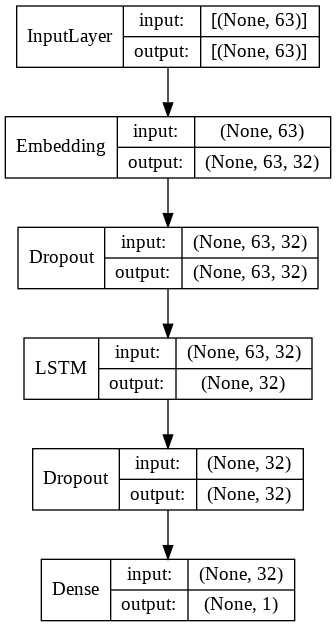

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
y_train.value_counts()

0    640002
1    639998
Name: polarity, dtype: int64

## Train the LSTM

In [ ]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=2,validation_split=0.2,verbose=1) 

Epoch 1/2
1024/1024 [==============================] - 623s 606ms/step - loss: 0.5150 - accuracy: 0.7413 - val_loss: 0.4191 - val_accuracy: 0.8076
Epoch 2/2
1024/1024 [==============================] - 585s 571ms/step - loss: 0.3460 - accuracy: 0.8505 - val_loss: 0.4334 - val_accuracy: 0.8030


## Evaluate model with test data and view results

In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.80      0.80      0.80    159998
    Positive       0.80      0.80      0.80    160002

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



## View some incorrect predictions

Lets have a look at some of the incorrectly classified reviews. For readability we remove the padding.



In [ ]:
predicted_classes_reshaped = np.reshape(predicted_classes, 320000)

incorrect = np.nonzero(predicted_classes_reshaped!=y_test.values)[0]

# We select the first 10 incorrectly classified reviews
for j, incorrect in enumerate(incorrect[0:20]):
    
    predicted = class_names[predicted_classes_reshaped[incorrect]]
    actual = class_names[y_test[incorrect]]
    human_readable_review = decode_review(x_test[incorrect])
    
    print("Incorrectly classified Test Review ["+ str(j+1) +"]") 
    print("Test Review #" + str(incorrect)  + ": Predicted ["+ predicted + "] Actual ["+ actual + "]")
    print("Test Review Text: " + human_readable_review.replace("<PAD> ", ""))
    print("")

Incorrectly classified Test Review [1]
Test Review #1: Predicted [Negative] Actual [Positive]
Test Review Text: aww you can be my

Incorrectly classified Test Review [2]
Test Review #15: Predicted [Positive] Actual [Negative]
Test Review Text: could use sum lovin rite now

Incorrectly classified Test Review [3]
Test Review #28: Predicted [Negative] Actual [Positive]
Test Review Text: @gaelicwolf it'll be okay.. he won't be like this forever

Incorrectly classified Test Review [4]
Test Review #43: Predicted [Positive] Actual [Negative]
Test Review Text: @willclarkfan22 no donuts for you

Incorrectly classified Test Review [5]
Test Review #51: Predicted [Positive] Actual [Negative]
Test Review Text: @claudiagmodel why on sunday would love to have checked it out

Incorrectly classified Test Review [6]
Test Review #57: Predicted [Negative] Actual [Positive]
Test Review Text: okay, i need to go have some dinner and i need a break from sitting on my ass for so long.

Incorrectly classified T

In [ ]:
# Write your own review
# review = "insanely negative"
review = "good thing"

# Encode review (replace word with integers)
tmp = tokenizer.texts_to_sequences(review)

# Ensure review is 500 words long (by padding or truncating)
tmp_padded = sequence.pad_sequences(tmp, maxlen=review_length) 

# Run your processed review against the trained model
rawprediction = model.predict(tmp_padded)[0][0]
prediction = int(round(rawprediction))

# Test the model and print the result
print("Review: " + review)
print("Raw Prediction: " + str(rawprediction))
print("Predicted Class: " + class_names[prediction])

Review: good thing
Raw Prediction: 0.6936506
Predicted Class: Positive


In [ ]:
import sklearn.metrics as sm
def evaluate_model_lstm(pred,y):
  acc = sm.accuracy_score(y,pred)
  pr = sm.precision_score(y,pred)
  re = sm.recall_score(y,pred)
  f1 = sm.f1_score(pred, y, average='macro')
  return acc,pr,re,f1

In [ ]:
acc_lstm,pr_lstm,re_lstm,f1_lstm=evaluate_model_lstm(predicted_classes,y_test.values)
print("Accuracy : "+str(acc_lstm))
print("Precision : "+str(pr_lstm))
print("Recall : "+str(re_lstm))
print("F1 Score : "+str(f1_lstm))

Accuracy : 0.803690625
Precision : 0.8033764336419656
Recall : 0.8042149473131586
F1 Score : 0.8036905689425383


In [ ]:
metrics = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1 Score'],index=['randomforest','Naive bayes','SVM','LSTM'])
metrics.loc['randomforest']={'Accuracy':acc_rf,'Precision':pr_rf,'Recall':re_rf,'F1 Score':f1_rf}
metrics.loc['Naive bayes']={'Accuracy':acc_nb,'Precision':pr_nb,'Recall':re_nb,'F1 Score':f1_nb}
metrics.loc['LSTM']={'Accuracy':acc_lstm,'Precision':pr_lstm,'Recall':re_lstm,'F1 Score':f1_lstm}

In [ ]:
metrics

,Accuracy,Precision,Recall,F1 Score
randomforest,0.73945,0.726503,0.76804,0.739237
Naive bayes,0.773222,0.800344,0.728078,0.772759
SVM,NaN,NaN,NaN,NaN
LSTM,0.803691,0.803376,0.804215,0.803691


As, I was unable to train the svm model on the entire dataset I am not including SVM results. No matter what it disconnects the colab even after changing the colab's js to keep auto clicking the connect button. However, based on the above mentioned metrics that were calculated for LSTMs, Random Forest and Naive Bayes using the entire datasetes, I see that LSTMs have outperformed the other probabilistic models. A slight increase in the performance metrics of LSTMs could be attributed to the fact that they are dense neural layers connected to one another with a short term memory i.e. LSTMs try to classify the observations by establishing a clear discrimination between positive and negative models rather than just having a simple probabilistic approach. I also believe, SVM would have performed better than Naive Bayes and random forests as SVMs are geometrical models that work better for tasks such as classification due to the fact that they do not consider the invididual observations as independent variables. This is also the same reason in LSTMs with their short term memory, that lay some relationship between different variables as this is a very important approach in fields like NLP where every word in a sentence is not usually independent of each other rather carries a meaning with interdependence.

To improve the models performance we need first clean the data of all the unecessary punctuation marks and noise like @mentions. This will help the classifier to capture only the useful information. We could also remove stopwords from the sentences, but while removing the stop words proper care must be taken to make sure the action is not causing any altering of meaning in text. Stopwords are not always general, stopwords are usually specific in regard to the topic. Something like social media tweets would have specific words like "re-tweet","tweet","twitter","userprofile" etc  and some general stopwords like "the”, “a”, “an”.

Using Vader mentioned in the 5th question is indeed a very good way of classifying the dataset into different polarities. That is because VADERr is a lexicon and rule-based sentiment analysis approach that is specifically trained to identify sentiments in social media text. The VADER model of nltk is pretrained on enormous social media data and as our  data focuses on social media tweets training and testing for sentiment analysis, something like VADER that is already pretrained on huge data will be a good approach as compared to the other three. Also because VADER can quantify emotion and intensity of emotion in a text along with understanding emoticons, slangs, punctuations, that makes it a good option. However, in cases were the dataset is atypical and not in the lines of what VADER was used for, then it would not serve for a good purpose.

# **5.**

Add to the comparison of #4 a the manually calculated precision, recall and F1 score
using VADER and their suggested defaults to categorize the test split tweets in positive
or negative. Answer the following questions: Is this approach as good as the previous
ones? Why do you think this is? (30 points)


Comparision mentioned in the previous answer

In [ ]:
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==1)], test_size=0.20, random_state=seed_value)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()

In [ ]:
a_test = a_test.drop(['date','query','user','id'],axis=1)
a_test

,polarity,text
402563,0,is going to bed now after a day of hard work -...
1558129,1,@lilxicanita aww mecheee you can be my friend....
1415201,1,having my big brother open for me is a dream c...
1112565,1,acting going well. will reach goal by God's gr...
706645,0,@morganmovement what?! Wtf happened?! I'm doin...
...,...,...
1087432,1,@mileycyrus http://twitpic.com/5ppwd - I have ...
1520516,1,"@gin_lady thanks, lots of sleep and knitting s..."
728046,0,just watched like a three hour movie arizona i...
285604,0,I saw all the 'tussen de oren' episodes and f...


In [ ]:
a_test[['neg', 'neu', 'pos', 'compound']] = a_test['text'].apply(sia.polarity_scores).apply(pd.Series)

In [ ]:
a_test

,polarity,text,neg,neu,pos,compound,predicted_labels
402563,0,is going to bed now after a day of hard work -...,0.067,0.813,0.120,0.2732,1
1558129,1,@lilxicanita aww mecheee you can be my friend....,0.000,1.000,0.000,0.0000,None
1415201,1,having my big brother open for me is a dream c...,0.000,0.779,0.221,0.5905,1
1112565,1,acting going well. will reach goal by God's gr...,0.000,0.500,0.500,0.6124,1
706645,0,@morganmovement what?! Wtf happened?! I'm doin...,0.240,0.760,0.000,-0.6950,0
...,...,...,...,...,...,...,...
1087432,1,@mileycyrus http://twitpic.com/5ppwd - I have ...,0.000,1.000,0.000,0.0000,None
1520516,1,"@gin_lady thanks, lots of sleep and knitting s...",0.000,0.556,0.444,0.6808,1
728046,0,just watched like a three hour movie arizona i...,0.000,0.839,0.161,0.3612,1
285604,0,I saw all the 'tussen de oren' episodes and f...,0.255,0.745,0.000,-0.7316,0


Based on the data given in https://github.com/cjhutto/vaderSentiment#about-the-scoring , I am using compound score to evaluate the labels.

In [ ]:
a_test[['predicted_labels']] = a_test['compound'].apply(lambda x : "1" if x >= 0.05 else ("0" if x <= -0.05 else "1"))
# a_test.predicted_labels.astype(np.int16)

In [ ]:
a_test= a_test.astype({'polarity':'int16','predicted_labels':'int16'})
a_test

,polarity,text,neg,neu,pos,compound,predicted_labels
402563,0,is going to bed now after a day of hard work -...,0.067,0.813,0.120,0.2732,1
1558129,1,@lilxicanita aww mecheee you can be my friend....,0.000,1.000,0.000,0.0000,1
1415201,1,having my big brother open for me is a dream c...,0.000,0.779,0.221,0.5905,1
1112565,1,acting going well. will reach goal by God's gr...,0.000,0.500,0.500,0.6124,1
706645,0,@morganmovement what?! Wtf happened?! I'm doin...,0.240,0.760,0.000,-0.6950,0
...,...,...,...,...,...,...,...
1087432,1,@mileycyrus http://twitpic.com/5ppwd - I have ...,0.000,1.000,0.000,0.0000,1
1520516,1,"@gin_lady thanks, lots of sleep and knitting s...",0.000,0.556,0.444,0.6808,1
728046,0,just watched like a three hour movie arizona i...,0.000,0.839,0.161,0.3612,1
285604,0,I saw all the 'tussen de oren' episodes and f...,0.255,0.745,0.000,-0.7316,0


In [ ]:
t = a_test[(a_test["polarity"] == a_test["predicted_labels"])]
f = a_test[(a_test["polarity"] != a_test["predicted_labels"])]

In [ ]:
t.count()['polarity'] + f.count()['polarity']

320000

In [ ]:
tp = t[t['predicted_labels']==1].count()['polarity']
tn = t[t['predicted_labels']==0].count()['polarity']
fp = f[f['predicted_labels']==1].count()['polarity']
fn = f[f['predicted_labels']==0].count()['polarity']

In [ ]:
tn+tp+fp+fn

320000

In [ ]:
print("Accuracy : "+str((tp+tn)/(tp+tn+fp+fn)))
print("Precision : "+str(tp/(tp+fp)))
print("Recall : "+str(tp/(tp+fn)))
print("F1 Score : "+str(2*((tp/(tp+fp)*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

Accuracy : 0.659321875
Precision : 0.6075383349855519
Recall : 0.9001137485781427
F1 Score : 0.7254374057125299


# **Bonus (30 points):**

Try the following things to improve the LSTM model:

1) Use 90% training data, 10% testing
2) Remove stopwords from the tweets.
3) Remove all user mentions for the tweets (@something)
Compare all three new models in terms of their precision, recall and F1 score. Answer the
following questions: Did this change the results in any way? Why do you think so?

In [ ]:
import regex as re

# **A**

90% Training data and 10% test data

In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==1)], test_size=0.10, random_state=seed_value)
nltk.download('stopwords')
from nltk.corpus import stopwords
s_words = stopwords.words('english')
print(s_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
x_train = []
x_test = []
for i in a_train.text:
    x_train.append(i)
for i in a_test.text:
    x_test.append(i)
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = a_train.polarity.reset_index()['polarity']
y_test = a_test.polarity.reset_index()['polarity']
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)
# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[60]))
print("  Review Sentiment: " + str(y_train[60]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[60]))
print("  Review Sentiment: " + class_names[y_train[60]])

In [ ]:
# The length of reviews
review_length = len(max((allreviews), key=len))

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = 32,input_length = review_length))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 63, 32)            35413888  
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 35,422,241
Trainable params: 35,422,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=2,validation_split=0.2,verbose=1) 

Epoch 1/2
1152/1152 [==============================] - 477s 412ms/step - loss: 0.5126 - accuracy: 0.7420 - val_loss: 0.4143 - val_accuracy: 0.8103
Epoch 2/2
1152/1152 [==============================] - 461s 400ms/step - loss: 0.3415 - accuracy: 0.8522 - val_loss: 0.4260 - val_accuracy: 0.8064


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81     80144
    Positive       0.82      0.80      0.81     79856

    accuracy                           0.81    160000
   macro avg       0.81      0.81      0.81    160000
weighted avg       0.81      0.81      0.81    160000



# **B**

Remove all user mentions for the tweets (@something)

In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==1)], test_size=0.20, random_state=seed_value)

In [ ]:
x_train = []
x_test = []
count = []
for i in a_train.text:
    # print(i)
    i = re.sub(r'@\w+ ?','', i)
    # print(st)
    x_train.append(i)
for i in a_test.text:
    # print(i)
    i = re.sub(r'@\w+ ?','', i)
    # print(st)
    x_test.append(i)
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    filters='',
    num_words=None,
    lower=True,
    split=" ",
    char_level=False,
)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = a_train.polarity.reset_index()['polarity']
y_test = a_test.polarity.reset_index()['polarity']
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Concatonate test and training datasets
allreviews = np.concatenate((x_train, x_test), axis=0)
# Review lengths across test and training whole datasets
print("Maximum review length: {}".format(len(max((allreviews), key=len))))
print("Minimum review length: {}".format(len(min((allreviews), key=len))))
result = [len(x) for x in allreviews]
print("Mean review length: {}".format(np.mean(result)))

# Print a review and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Review")
print("  Review Text: " + str(x_train[60]))
print("  Review Sentiment: " + str(y_train[60]))

# Print a review and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Review")
print("  Review Text: " + decode_review(x_train[60]))
print("  Review Sentiment: " + class_names[y_train[60]])

In [ ]:
# The length of reviews
review_length = len(max((allreviews), key=len))

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = 32,input_length = review_length))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 63, 32)            22858496  
_________________________________________________________________
dropout_6 (Dropout)          (None, 63, 32)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 22,866,849
Trainable params: 22,866,849
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=2,validation_split=0.2,verbose=1) 

Epoch 1/2
1024/1024 [==============================] - 371s 360ms/step - loss: 0.5190 - accuracy: 0.7370 - val_loss: 0.4195 - val_accuracy: 0.8061
Epoch 2/2
1024/1024 [==============================] - 353s 344ms/step - loss: 0.3707 - accuracy: 0.8362 - val_loss: 0.4196 - val_accuracy: 0.8084


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.81      0.81      0.81    159998
    Positive       0.81      0.81      0.81    160002

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



# **C**

Remove stopwords from the tweets.


In [ ]:
a_train,a_test = train_test_split(train[(train['polarity']==0) | (train['polarity']==1)], test_size=0.20, random_state=seed_value)
nltk.download('stopwords')
from nltk.corpus import stopwords
s_words = stopwords.words('english')
print(s_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
x_train = []
x_test = []
count = []
for i in a_train.text:
    # print(i)
    st=""
    st =" ".join([word for word in nltk.word_tokenize(i) if word not in s_words])
    # print(st)
    x_train.append(st)
for i in a_test.text:
    # print(i)
    st=""
    st =" ".join([word for word in nltk.word_tokenize(i) if word not in s_words])
    # print(st)
    x_test.append(st)
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
y_train = a_train.polarity.reset_index()['polarity']
y_test = a_test.polarity.reset_index()['polarity']
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# The length of reviews
review_length = 100

# Padding / truncated our reviews
x_train = sequence.pad_sequences(x_train, maxlen = review_length)
x_test = sequence.pad_sequences(x_test, maxlen = review_length)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = vocab_size,output_dim = 32,input_length = review_length))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.LSTM(units=32))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Compile the model
model.compile(
    loss=tf.keras.losses.binary_crossentropy, # loss function
    optimizer=tf.keras.optimizers.Adam(), # optimiser function
    metrics=['accuracy']) # reporting metric

# Display a summary of the models structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           22132576  
_________________________________________________________________
dropout (Dropout)            (None, 100, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 22,140,929
Trainable params: 22,140,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train,y_train,batch_size=1000,epochs=2,validation_split=0.2,verbose=1) 

Epoch 1/2
1024/1024 [==============================] - 466s 453ms/step - loss: 0.5251 - accuracy: 0.7366 - val_loss: 0.4349 - val_accuracy: 0.7981
Epoch 2/2
1024/1024 [==============================] - 459s 448ms/step - loss: 0.3902 - accuracy: 0.8265 - val_loss: 0.4414 - val_accuracy: 0.7964


In [ ]:
# Get Model Predictions for test data
from sklearn.metrics import classification_report
predicted_classes = model.predict_classes(x_test)
print(classification_report(y_test, predicted_classes, target_names=class_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

    Negative       0.79      0.80      0.80    159998
    Positive       0.80      0.79      0.80    160002

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



There is a definite increase of performace after using 90% of data for training as compared to the 80% initially. The same is observed with the removal of @mentions. This is because neural networks or any deep learning models always perform better with more data. The more is the training data the better are the estimates or outputs (in our case classes). Removal of @mentions sort of cleans the data and thus results in a slight increase of performance. However, the removal of stopwords has not shown any significant improvement rather a slight decrease in performance. I believe it is so because social media text is not usually plain english, different people speak in different styles. And saying something like "I did not like his behaviour" vs "I hate his behaviour" though convey the same meaning but once are devoid of stopwords would become "like behaviour" and "hate behaviour". This completely alters the meaning of the text. So, during the course of training such text classifier would have misunderstood few sentences.